In [1]:
import random
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN 
import sklearn.utils


In [2]:
df = pd.read_csv('clus.csv')
print(df.head(10))
print(df.dtypes)
print(df.shape)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
(200, 5)


In [3]:
print(df['Gender'].value_counts())
print(df['Age'].value_counts())
print(df['Annual Income (k$)'].value_counts())
print(df['Spending Score (1-100)'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64
Age
32    11
35     9
31     8
19     8
30     7
49     7
23     6
40     6
36     6
27     6
47     6
38     6
50     5
20     5
21     5
29     5
48     5
34     5
67     4
54     4
24     4
59     4
18     4
28     4
22     3
25     3
46     3
43     3
39     3
60     3
45     3
37     3
33     3
68     3
58     2
41     2
52     2
57     2
65     2
53     2
51     2
42     2
70     2
44     2
26     2
63     2
66     2
64     1
69     1
55     1
56     1
Name: count, dtype: int64
Annual Income (k$)
54     12
78     12
60      6
48      6
63      6
       ..
101     2
113     2
120     2
126     2
137     2
Name: count, Length: 64, dtype: int64
Spending Score (1-100)
42    8
55    7
73    6
46    6
52    5
     ..
89    1
85    1
23    1
8     1
18    1
Name: count, Length: 84, dtype: int64


In [4]:
data = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
data.Gender[data['Gender'] == 'Male'] = 0
data.Gender[data['Gender'] == 'Female'] = 1
print(data.dtypes)
data.head()
# data[['Age','Annual Income (k$)','Spending Score (1-100)']] = 

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


/tmp/ipykernel_14330/441606239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender[data['Gender'] == 'Male'] = 0
/tmp/ipykernel_14330/441606239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender[data['Gender'] == 'Female'] = 1


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [5]:
data[['Gender','Age','Annual','Spending']] = data[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].apply(pd.to_numeric, errors='coerce')
data = data.dropna()
data = data.reset_index(drop=True)
data.shape

/tmp/ipykernel_14330/2757331903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Gender','Age','Annual','Spending']] = data[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].apply(pd.to_numeric, errors='coerce')


(200, 6)

In [6]:
X  = data.values
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148, -1.73899919,
        -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407, -1.73899919,
         1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298, -1.70082976,
        -1.71591298],
       ...,
       [-1.12815215, -0.49160182,  2.49780745,  0.92395314,  2.49780745,
         0.92395314],
       [-1.12815215, -0.49160182,  2.91767117, -1.25005425,  2.91767117,
        -1.25005425],
       [-1.12815215, -0.6351352 ,  2.91767117,  1.27334719,  2.91767117,
         1.27334719]])

In [7]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [8]:
data["Clus3"] = labels
data.tail(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual,Spending,Clus3
195,1,35,120,79,120,79,1
196,1,45,126,28,126,28,2
197,0,32,126,74,126,74,1
198,0,32,137,18,137,18,2
199,0,30,137,83,137,83,1


In [9]:
data.groupby('Clus3').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual,Spending
Clus3,,,,,,
0,0.593496,40.325203,44.154472,49.829268,44.154472,49.829268
1,0.538462,32.692308,86.538462,82.128205,86.538462,82.128205
2,0.473684,40.394737,87.000000,18.631579,87.000000,18.631579


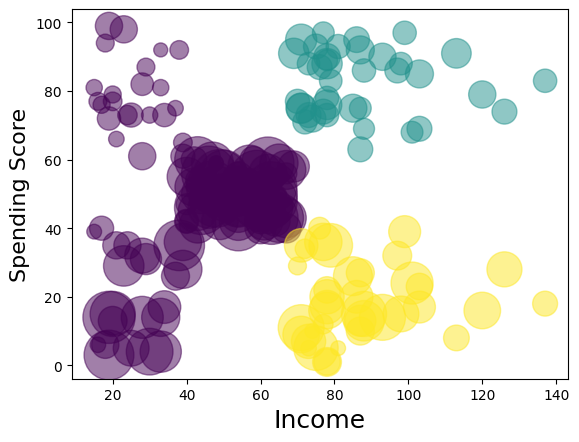

In [10]:
#devideo by 10
area = np.pi * ( X[:, 1])**2/10  
plt.scatter(X[:, 2], X[:, 3], s=area, c=labels.astype(np.float32), alpha=0.5)
plt.xlabel('Income', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)

plt.show()


[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


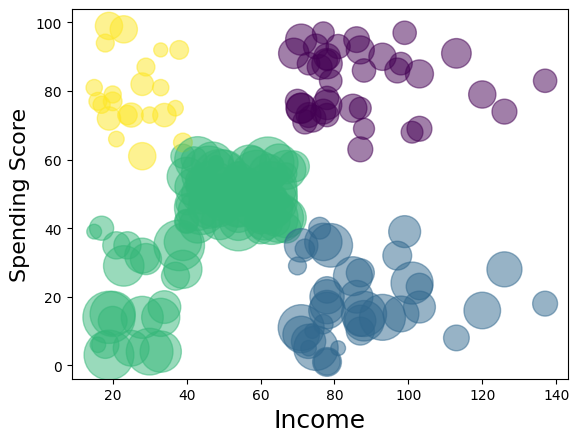

In [11]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)
data["Clus4"] = labels
data.tail(5)
data.groupby('Clus4').mean()
area = np.pi * ( X[:, 1])**2/10  
plt.scatter(X[:, 2], X[:, 3], s=area, c=labels.astype(np.float32), alpha=0.5)
plt.xlabel('Income', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)

plt.show()

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


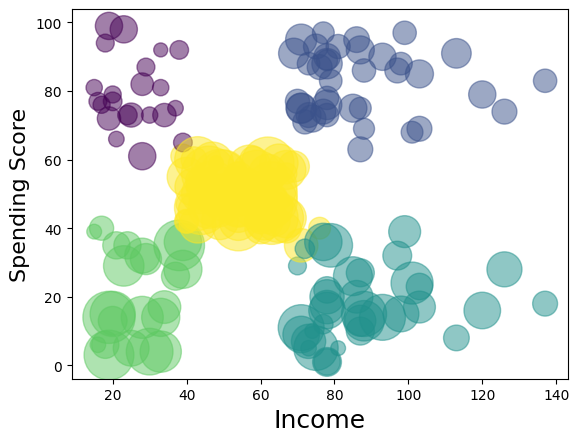

In [12]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)
data["Clus5"] = labels
data.tail(5)
data.groupby('Clus5').mean()
area = np.pi * ( X[:, 1])**2/10  
plt.scatter(X[:, 2], X[:, 3], s=area, c=labels.astype(np.float32), alpha=0.5)
plt.xlabel('Income', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)

plt.show()

In [13]:
print(data.head(10))
print(X)

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Annual  Spending  \
0       0   19                  15                      39      15        39   
1       0   21                  15                      81      15        81   
2       1   20                  16                       6      16         6   
3       1   23                  16                      77      16        77   
4       1   31                  17                      40      17        40   
5       1   22                  17                      76      17        76   
6       1   35                  18                       6      18         6   
7       1   23                  18                      94      18        94   
8       0   64                  19                       3      19         3   
9       1   30                  19                      72      19        72   

   Clus3  Clus4  Clus5  
0      0      2      3  
1      0      3      0  
2      0      2      3  
3      0      3    

In [14]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx [0:10]

array([[0.        , 0.01923077, 0.        , 0.3877551 , 0.        ,
        0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653, 0.        ,
        0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041, 0.00819672,
        0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 , 0.00819672,
        0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918, 0.01639344,
        0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612, 0.01639344,
        0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041, 0.02459016,
        0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959, 0.02459016,
        0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816, 0.03278689,
        0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 , 0.03278689,
        0.7244898 ]])

In [15]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

/tmp/ipykernel_14330/458117257.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.60731065, 1.10782882, ..., 1.40470829, 1.4677659 ,
        1.56458105],
       [0.60731065, 0.        , 1.47373373, ..., 1.30788223, 1.69448492,
        1.42505741],
       [1.10782882, 1.47373373, 0.        , ..., 1.90842699, 1.74659366,
        2.05888893],
       ...,
       [1.40470829, 1.30788223, 1.90842699, ..., 0.        , 0.81811998,
        0.18602777],
       [1.4677659 , 1.69448492, 1.74659366, ..., 0.81811998, 0.        ,
        0.938787  ],
       [1.56458105, 1.42505741, 2.05888893, ..., 0.18602777, 0.938787  ,
        0.        ]])

In [16]:
import pylab
import scipy.cluster.hierarchy as hierarchy
from scipy.cluster.hierarchy import fcluster
Z = hierarchy.linkage(D, 'complete')
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

/tmp/ipykernel_14330/3217866605.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


array([25, 19,  3,  7, 10,  7,  2,  6, 29,  7, 29,  6,  2,  7, 24, 19, 10,
       19, 24,  6, 24, 19,  2, 19,  2, 19, 10, 23, 10,  7, 29,  7, 29, 19,
        2,  7, 10, 14, 10,  7, 12, 19, 28, 14, 10, 14, 11, 17, 17, 17, 11,
       23, 17, 28, 11, 28, 11, 26, 17, 28, 26, 22, 12, 11, 28, 22, 11, 12,
       22, 17, 26, 11, 11, 11, 28, 22, 11, 23, 17, 11, 28, 23, 26, 11, 17,
       27, 11, 17, 16, 11, 12, 22, 27, 16, 16, 22, 11, 17, 27, 22, 17, 11,
       26, 22, 27, 17, 12, 27, 26, 26, 26, 17, 16, 22, 17, 17, 12, 11, 11,
       11, 22, 16, 16, 21, 15, 13, 27, 21, 32, 20, 32, 20, 15, 13, 31,  9,
        1, 20, 31, 13,  1, 21, 15,  9, 31, 21, 27, 13,  5, 21, 32, 21,  5,
       13,  5,  9, 32, 13, 32, 13, 12,  9, 31,  9, 32, 13, 32,  9,  5, 20,
       32, 20, 32, 21,  5,  9, 32, 20, 32, 21, 15,  9, 32,  9, 15, 21,  5,
       20,  5,  9,  5,  9, 30,  8,  4,  8,  4, 18, 30, 18], dtype=int32)

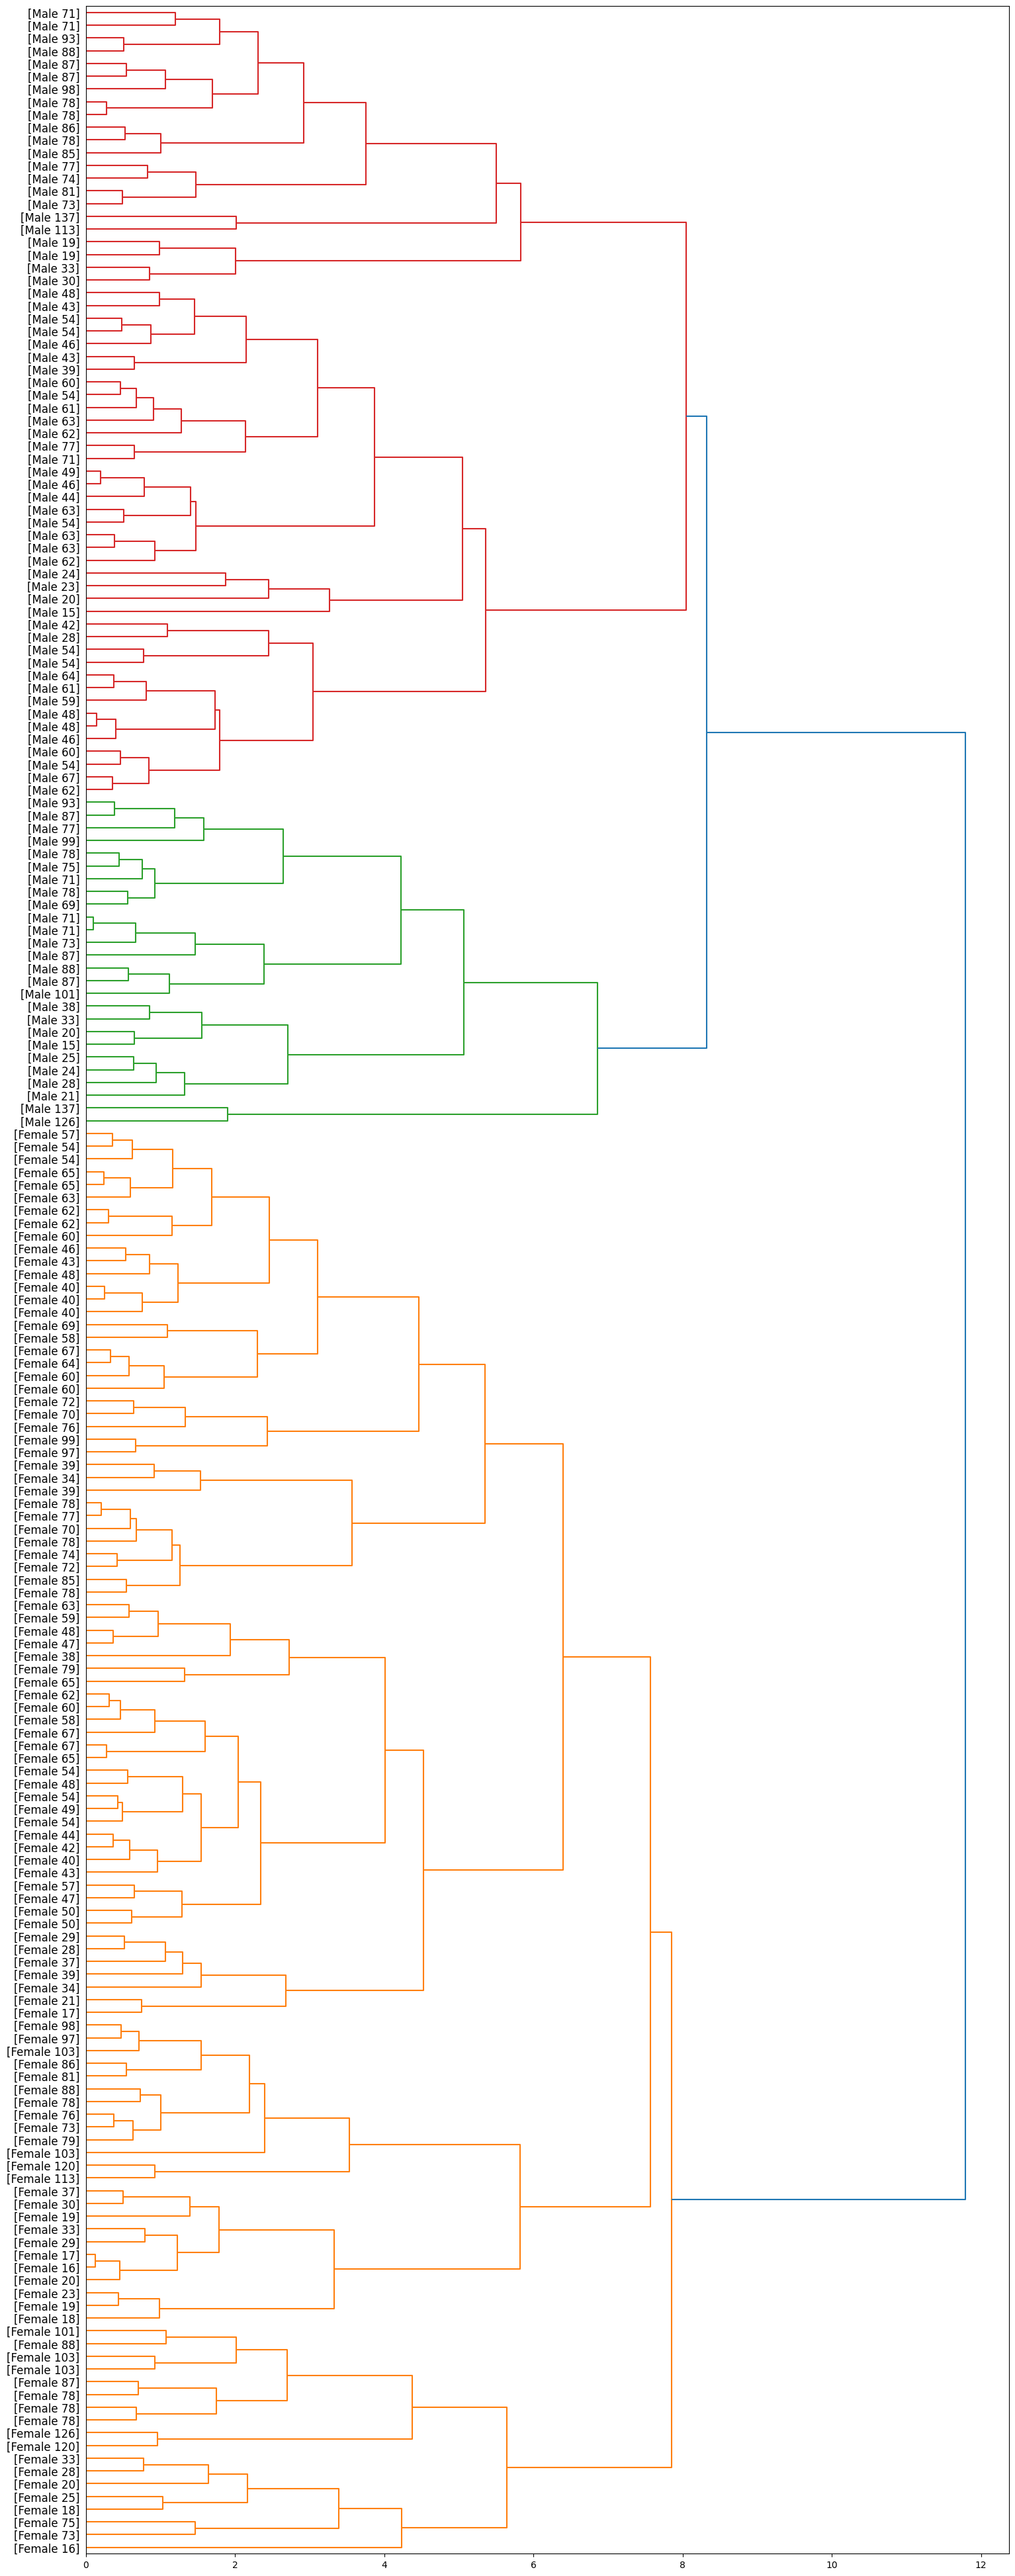

In [17]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (df['Gender'][id], df['Annual Income (k$)'][id])
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [18]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(D)
print(agglom.labels_)
data['cluster3_'] = agglom.labels_
data.head()

[0 2 1 1 1 1 1 1 0 1 0 1 1 1 0 2 1 2 0 1 0 2 1 2 1 2 1 0 1 1 0 1 0 2 1 1 1
 1 1 1 1 2 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 2 1 1 0 2 0 2 0 2 1 1 0 1 1 2 0 1 1 2 1 1 0 2 0 1
 1 2 0 2 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 2 0 2 0 2 1 1 0 2 0 2 1 1 0 1 1
 2 1 2 1 1 1 1 0 1 1 1 1 2 0 2]


/home/reza/course/machineLearning/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:567: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual,Spending,Clus3,Clus4,Clus5,cluster3_
0,0,19,15,39,15,39,0,2,3,0
1,0,21,15,81,15,81,0,3,0,2
2,1,20,16,6,16,6,0,2,3,1
3,1,23,16,77,16,77,0,3,0,1
4,1,31,17,40,17,40,0,2,3,1


/tmp/ipykernel_14330/3759866537.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Annual, subset.Spending, s=subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)
/tmp/ipykernel_14330/3759866537.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Annual, subset.Spending, s=subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)
/tmp/ipykernel_14330/3759866537.py:12: Use

Text(0, 0.5, 'Spending')

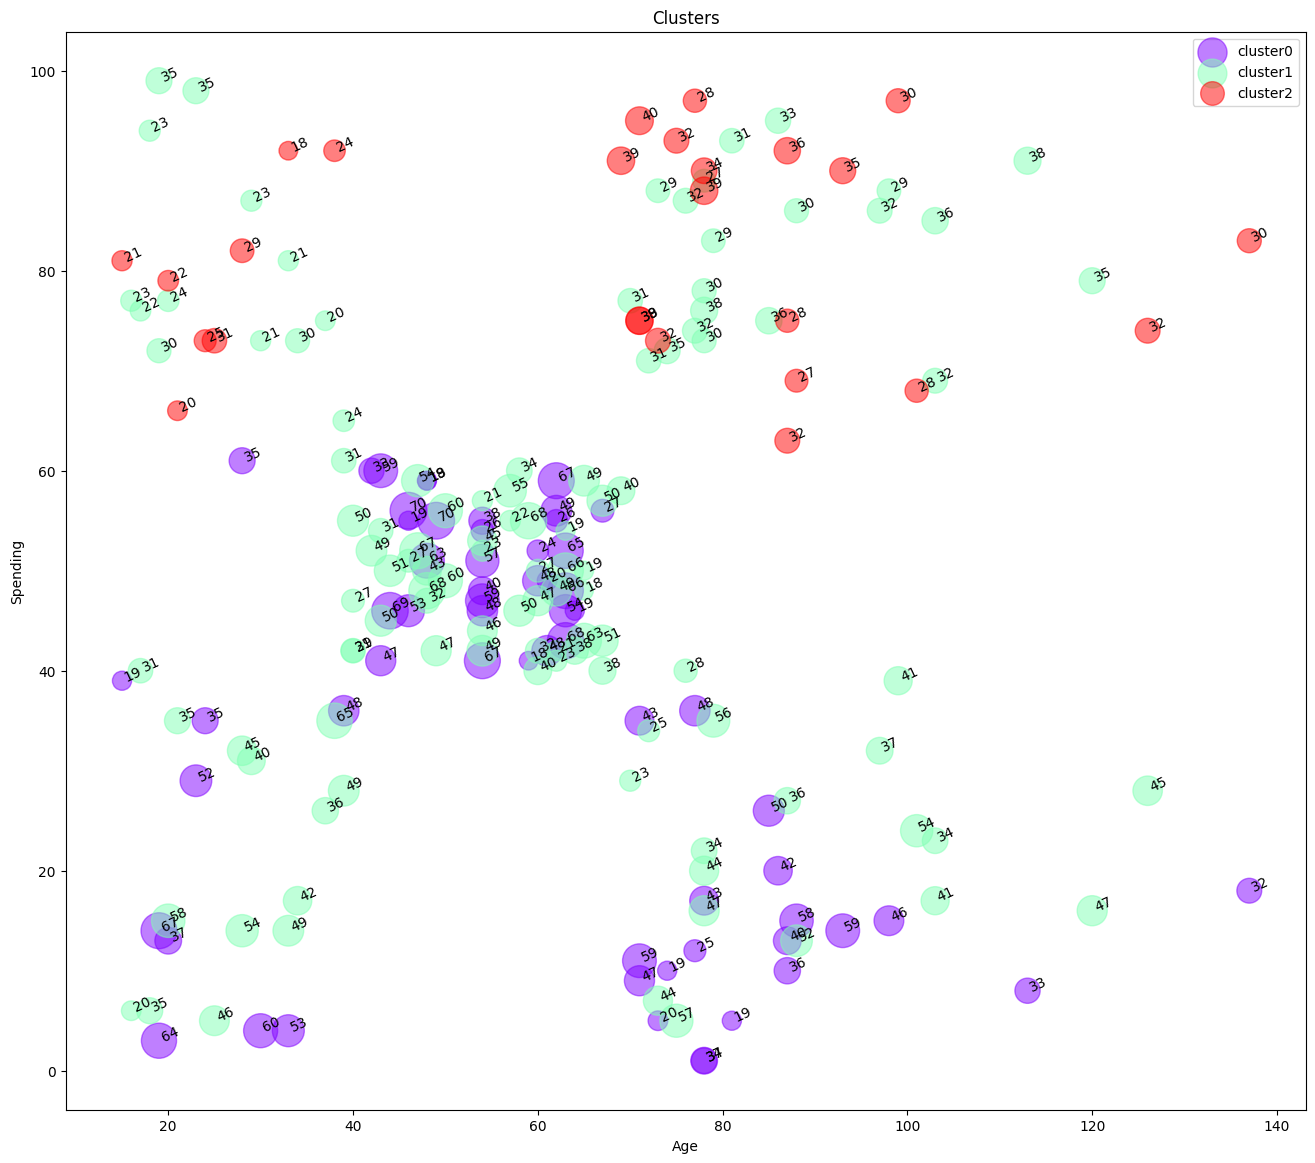

In [19]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster3_ == label]
    for i in subset.index:
            plt.text(subset.Annual[i], subset.Spending[i],str(subset['Age'][i]), rotation=25)
    plt.scatter(subset.Annual, subset.Spending, s=subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending')

[3 2 0 0 0 0 0 0 1 0 1 0 0 0 3 2 0 2 3 0 3 2 0 2 0 2 0 3 0 0 1 0 1 2 0 0 0
 0 0 0 0 2 3 0 0 0 0 0 0 0 0 3 0 3 0 3 0 3 0 3 3 3 0 0 3 3 0 0 3 0 3 0 0 0
 3 3 0 3 0 0 3 3 3 0 0 3 0 0 0 0 0 3 3 0 0 3 0 0 3 3 0 0 3 3 3 0 0 3 3 3 3
 0 0 3 0 0 0 0 0 0 3 0 0 2 0 0 3 2 1 2 1 2 0 0 1 0 0 2 1 0 0 2 0 0 1 2 3 0
 0 2 1 2 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 2 1 2 1 2 0 0 1 2 1 2 0 0 1 0 0
 2 0 2 0 0 0 0 1 0 0 0 0 2 1 2]


/home/reza/course/machineLearning/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:567: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/tmp/ipykernel_14330/1128965205.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Annual, subset.Spending, s=subset.Annual*10, c=color, label='cluster'+str(label),alpha=0.5)
/tmp/ipykernel_14330/1128965205.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & 

Text(0, 0.5, 'Spending')

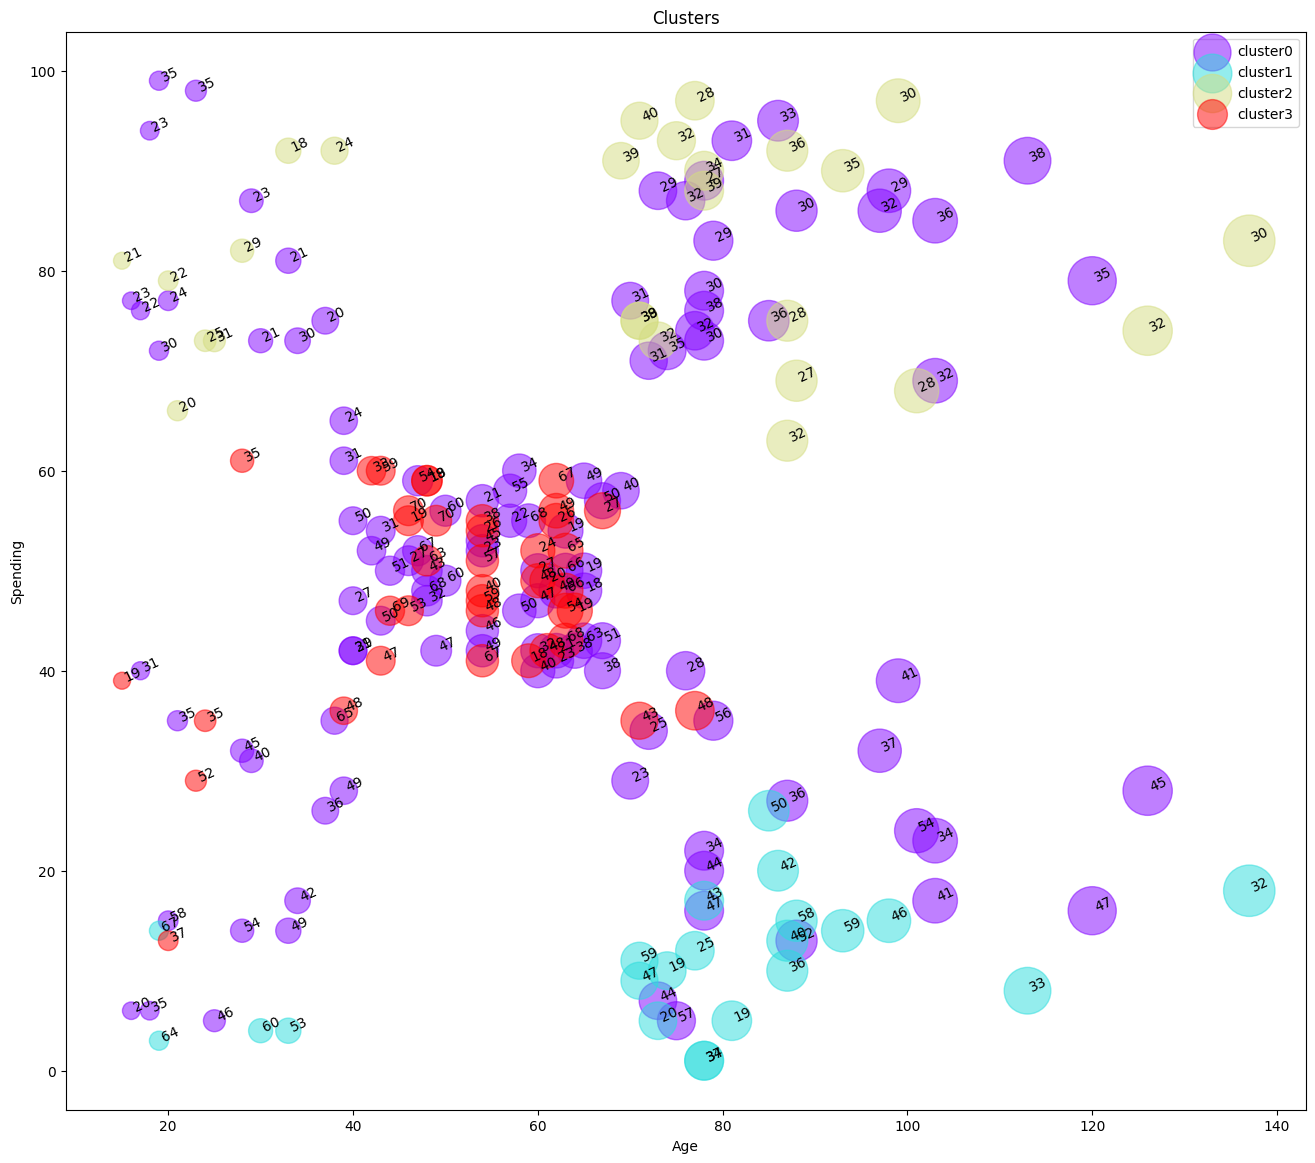

In [20]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(D)
print(agglom.labels_)
data['cluster4_'] = agglom.labels_
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster4_ == label]
    for i in subset.index:
            plt.text(subset.Annual[i], subset.Spending[i],str(subset['Age'][i]), rotation=25)
    plt.scatter(subset.Annual, subset.Spending, s=subset.Annual*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending')

[3 2 4 0 0 0 4 0 1 0 1 0 4 0 3 2 0 2 3 0 3 2 4 2 4 2 0 3 0 0 1 0 1 2 4 0 0
 0 0 0 0 2 3 0 0 0 0 0 0 0 0 3 0 3 0 3 0 3 0 3 3 3 0 0 3 3 0 0 3 0 3 0 0 0
 3 3 0 3 0 0 3 3 3 0 0 3 0 0 0 0 0 3 3 0 0 3 0 0 3 3 0 0 3 3 3 0 0 3 3 3 3
 0 0 3 0 0 0 0 0 0 3 0 0 2 0 0 3 2 1 2 1 2 0 0 1 0 4 2 1 0 4 2 0 0 1 2 3 0
 4 2 1 2 4 0 4 0 1 0 1 0 0 0 1 0 1 0 1 0 4 2 1 2 1 2 4 0 1 2 1 2 0 0 1 0 0
 2 4 2 4 0 4 0 1 0 4 0 4 2 1 2]


/home/reza/course/machineLearning/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:567: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/tmp/ipykernel_14330/1190721207.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Annual, subset.Spending, s=subset.Annual*10, c=color, label='cluster'+str(label),alpha=0.5)
/tmp/ipykernel_14330/1190721207.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & 

Text(0, 0.5, 'Spending')

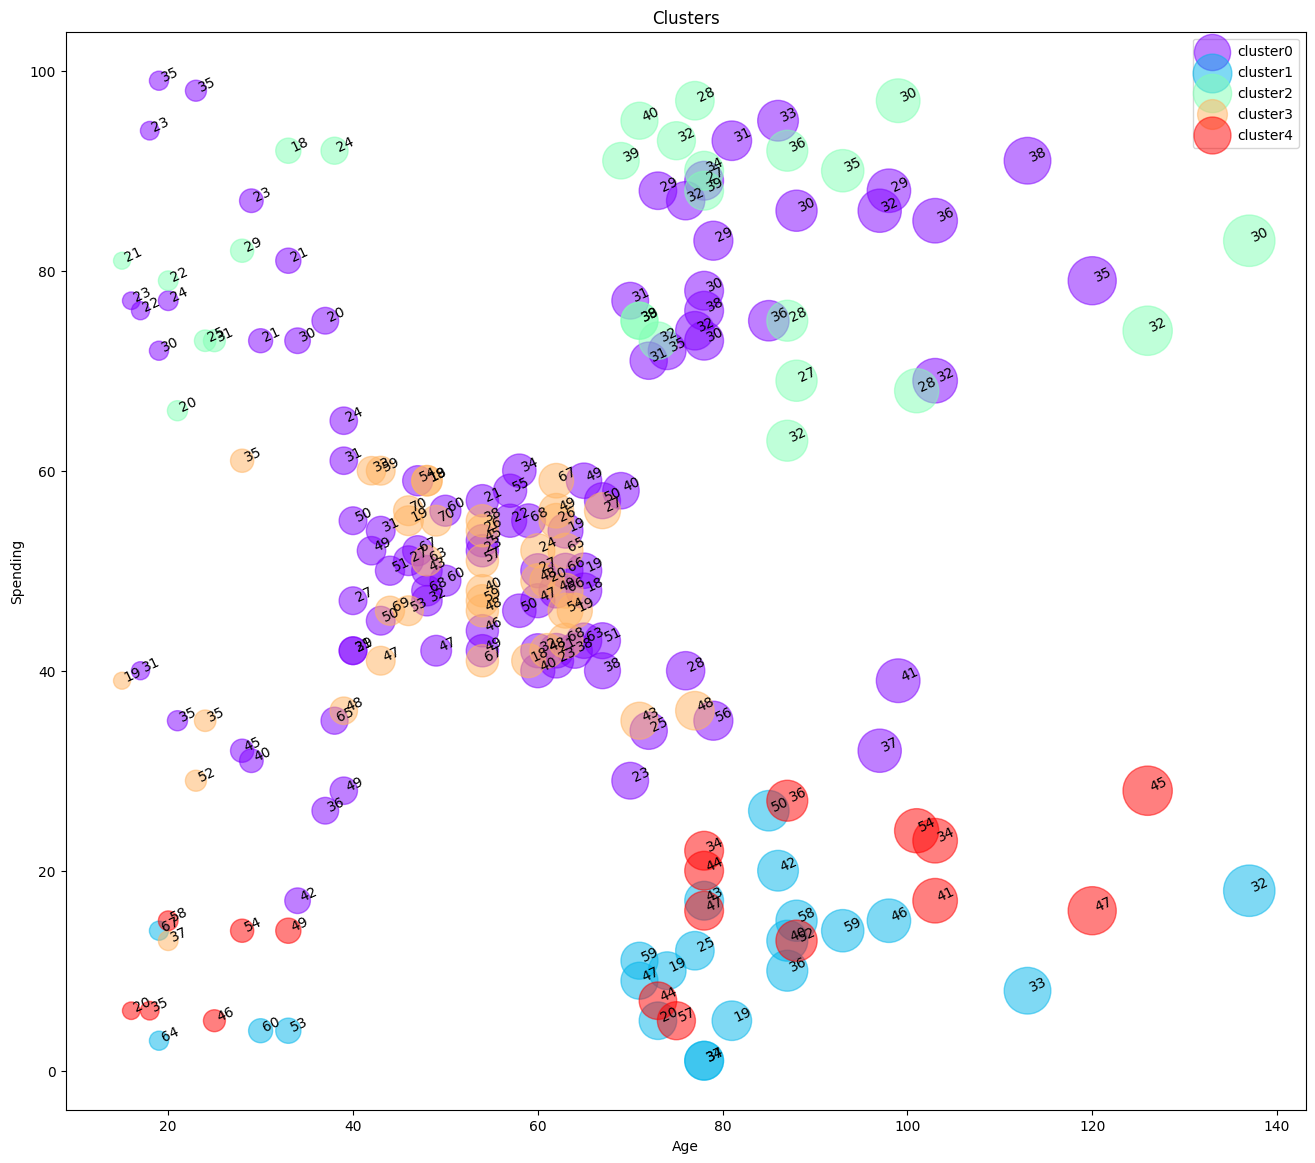

In [21]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(D)
print(agglom.labels_)
data['cluster5_'] = agglom.labels_
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster5_ == label]
    for i in subset.index:
            plt.text(subset.Annual[i], subset.Spending[i],str(subset['Age'][i]), rotation=25)
    plt.scatter(subset.Annual, subset.Spending, s=subset.Annual*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending')

In [22]:
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual,Spending,Clus3,Clus4,Clus5,cluster3_,cluster4_,cluster5_
0,0,19,15,39,15,39,0,2,3,0,3,3
1,0,21,15,81,15,81,0,3,0,2,2,2
2,1,20,16,6,16,6,0,2,3,1,0,4
3,1,23,16,77,16,77,0,3,0,1,0,0
4,1,31,17,40,17,40,0,2,3,1,0,0
5,1,22,17,76,17,76,0,3,0,1,0,0
6,1,35,18,6,18,6,0,2,3,1,0,4
7,1,23,18,94,18,94,0,3,0,1,0,0
8,0,64,19,3,19,3,0,2,3,0,1,1
9,1,30,19,72,19,72,0,3,0,1,0,0


In [23]:
Clus_dataSet

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148, -1.73899919,
        -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407, -1.73899919,
         1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298, -1.70082976,
        -1.71591298],
       ...,
       [-1.12815215, -0.49160182,  2.49780745,  0.92395314,  2.49780745,
         0.92395314],
       [-1.12815215, -0.49160182,  2.91767117, -1.25005425,  2.91767117,
        -1.25005425],
       [-1.12815215, -0.6351352 ,  2.91767117,  1.27334719,  2.91767117,
         1.27334719]])

In [24]:
db = DBSCAN(eps=1.45, min_samples=12)
data['ClusterDbscan'] = db.fit_predict(Clus_dataSet)
data['ClusterDbscan'].value_counts()
labels = db.labels_
labels

array([-1, -1, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0,
       -1,  1,  0,  1,  1, -1,  1,  0, -1,  0,  1,  0,  0, -1,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,
        1,  0,  1,  0,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,
        1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  1,  2,  1,  0,  0,  2,  0,
        0,  1,  2,  0, -1,  1,  0,  0,  2,  1,  1,  0,  0,  1,  2,  1,  0,
        0,  0,  0,  2,  0,  2,  0,  0,  0,  2,  0,  2,  0,  2,  0,  0,  1,
        2,  1,  2,  1,  0,  0,  2,  1,  2,  1,  0,  0,  2,  0,  0,  1,  0,
        1,  0,  0,  0,  0,  2,  0, -1,  0, -1, -1, -1, -1])

In [25]:
data.head(20)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual,Spending,Clus3,Clus4,Clus5,cluster3_,cluster4_,cluster5_,ClusterDbscan
0,0,19,15,39,15,39,0,2,3,0,3,3,-1
1,0,21,15,81,15,81,0,3,0,2,2,2,-1
2,1,20,16,6,16,6,0,2,3,1,0,4,-1
3,1,23,16,77,16,77,0,3,0,1,0,0,0
4,1,31,17,40,17,40,0,2,3,1,0,0,0
5,1,22,17,76,17,76,0,3,0,1,0,0,0
6,1,35,18,6,18,6,0,2,3,1,0,4,-1
7,1,23,18,94,18,94,0,3,0,1,0,0,0
8,0,64,19,3,19,3,0,2,3,0,1,1,-1
9,1,30,19,72,19,72,0,3,0,1,0,0,0


In [26]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,

In [27]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

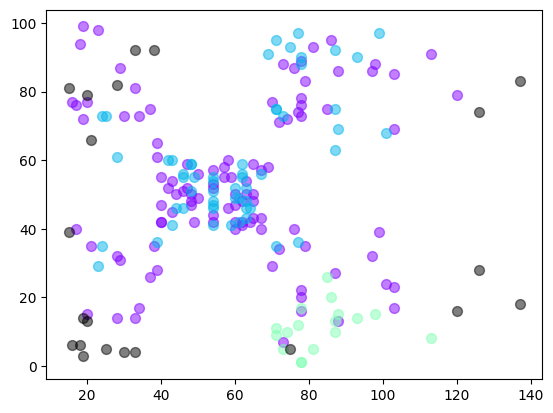

In [28]:
unique_labels = set(labels)
unique_labels
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=0.5)